In [71]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

In [72]:
X,y = load_digits(return_X_y=True)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
x_train,x_test,y_train ,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)



(((1437, 64), (1437,)), ((360, 64), (360,)))

In [74]:
# this is the size of our encoded representations
encoding_dim = 30  

input_shape = 64

# this is our input placeholder
input_img = Input(shape=(input_shape,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_shape, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
    
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [75]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Train on 1437 samples, validate on 360 samples
Epoch 1/10
1437/1437 [==============================] - 1s 423us/step - loss: 0.7462 - val_loss: 0.6931
Epoch 2/10
1437/1437 [==============================] - 0s 31us/step - loss: 0.6748 - val_loss: 0.6277
Epoch 3/10
1437/1437 [==============================] - 0s 23us/step - loss: 0.6068 - val_loss: 0.5627
Epoch 4/10
1437/1437 [==============================] - 0s 31us/step - loss: 0.5379 - val_loss: 0.4940
Epoch 5/10
1437/1437 [==============================] - 0s 31us/step - loss: 0.4641 - val_loss: 0.4185
Epoch 6/10
1437/1437 [==============================] - 0s 29us/step - loss: 0.3823 - val_loss: 0.3336
Epoch 7/10
1437/1437 [==============================] - 0s 15us/step - loss: 0.2898 - val_loss: 0.2369
Epoch 8/10
1437/1437 [==============================] - 0s 37us/step - loss: 0.1853 - val_loss: 0.1283
Epoch 9/10
1437/1437 [==============================] - 0s 29us/step - loss: 0.0672 - val_loss: 0.0051
Epoch 10/10
1437/1437 [==

In [76]:
reconst_test = autoencoder.predict(x_test)
encode_test = encoder.predict(x_test)

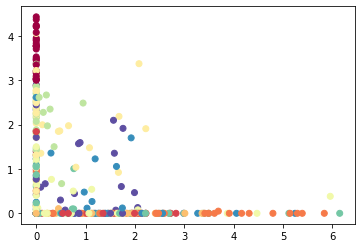

In [77]:
plt.scatter(encode_test[:,0],encode_test[:,1],c=y_test,cmap='Spectral')


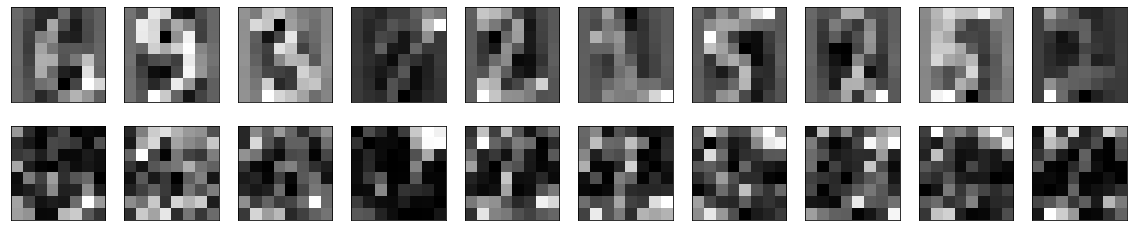

In [78]:
n = 10
row = 2

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
